<a href="https://colab.research.google.com/github/GGoYoungHee/COVID19-Classification/blob/main/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/VISION-covid_CT

/content/drive/MyDrive/VISION-covid_CT


In [3]:
ls

CT_COVID.zip  CT_NonCOVID.zip  Untitled0.ipynb


In [4]:
!unzip CT_COVID.zip

Archive:  CT_COVID.zip
   creating: CT_COVID/
  inflating: CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: __MACOSX/
   creating: __MACOSX/CT_COVID/
  inflating: __MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: __MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: __MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: CT_COVID/2020.02.25.20021568-p24-111%8.png  
  inflating: __MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%8.png  
  inflating: CT_COVID/2020.03.13.20035212-p23-153.png  
  inflating: __MACOSX/CT_COVID/._2020.03.13.20035212-p23-153.png  
  inflating: CT_COVID/2020.03.21.20040691-p18-6-6.png  
  inflating: __MACOSX/CT_COVID/._2020.03.21.20040691-p18-6-6.png  
  inflating: CT_COVID/2020.03.04.20

In [5]:
!unzip CT_NonCOVID.zip

Archive:  CT_NonCOVID.zip
  inflating: CT_NonCOVID/0.jpg       
  inflating: CT_NonCOVID/1%0.jpg     
  inflating: CT_NonCOVID/1%1.jpg     
  inflating: CT_NonCOVID/1%2.jpg     
  inflating: CT_NonCOVID/10%0.jpg    
  inflating: CT_NonCOVID/10%1.jpg    
  inflating: CT_NonCOVID/10%2.jpg    
  inflating: CT_NonCOVID/102.png     
  inflating: CT_NonCOVID/1029.png    
  inflating: CT_NonCOVID/103.png     
  inflating: CT_NonCOVID/1030.png    
  inflating: CT_NonCOVID/104.png     
  inflating: CT_NonCOVID/1046.png    
  inflating: CT_NonCOVID/1047.png    
  inflating: CT_NonCOVID/1048.png    
  inflating: CT_NonCOVID/1049.png    
  inflating: CT_NonCOVID/1050.png    
  inflating: CT_NonCOVID/1058.png    
  inflating: CT_NonCOVID/1059.png    
  inflating: CT_NonCOVID/1060.png    
  inflating: CT_NonCOVID/1061.png    
  inflating: CT_NonCOVID/1062.png    
  inflating: CT_NonCOVID/1065.png    
  inflating: CT_NonCOVID/1070.png    
  inflating: CT_NonCOVID/1071.png    
  inflating: CT_NonCOVID

In [7]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np # linear algebra
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.python.keras.utils import np_utils

#from keras.preprocessing.image import img_to_array
#from keras.preprocessing.image import load_img
#from keras.utils import np_utils

In [14]:
DATASET_DIR = "/content/drive/MyDrive/VISION-covid_CT"
os.listdir(DATASET_DIR)

['CT_COVID.zip',
 'CT_NonCOVID.zip',
 'Untitled0.ipynb',
 'CT_COVID',
 '__MACOSX',
 'CT_NonCOVID']

In [18]:
##데이터 불러오기
COVID_data = os.listdir(DATASET_DIR+"/CT_COVID")
print(COVID_data[:10]) #the output we get are the .png files

NONCOVID_data=os.listdir(DATASET_DIR+"/CT_NonCOVID")
print(NONCOVID_data[:10])

['2020.03.01.20029769-p21-73_1%1.png', 'Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png', '2020.03.12.20034686-p17-91-4.png', '2020.02.25.20021568-p24-111%8.png', '2020.03.13.20035212-p23-153.png', '2020.03.21.20040691-p18-6-6.png', '2020.03.04.20030395-p27-108%7.png', '2020.02.22.20024927-p19-68%3.png', '2020.03.07.20031393-p7-50%2.png', '2020.03.09.20033118-p20-93%0.png']
['0.jpg', '1%0.jpg', '1%1.jpg', '1%2.jpg', '10%0.jpg', '10%1.jpg', '10%2.jpg', '102.png', '1029.png', '103.png']


In [20]:
##이미지 데이터의 width와 height의 최소 픽셀사이즈를 구한다.
minh, minv = 100000,100000
for p in COVID_data:
    pic = Image.open(DATASET_DIR+'/CT_COVID'+"/"+p)
    if pic.size[0] < minh:
        minh = pic.size[0]
    if pic.size[1] < minv:
        minv = pic.size[1]
for u in NONCOVID_data:
    pic = Image.open(DATASET_DIR+'/CT_NonCOVID'+"/"+u)
    if pic.size[0] < minh:
        minh = pic.size[0]
    if pic.size[1] < minv:
        minv = pic.size[1]
print(minh)
print(minv)

115
61


# COVID/NONCOVID 이미지 시각화

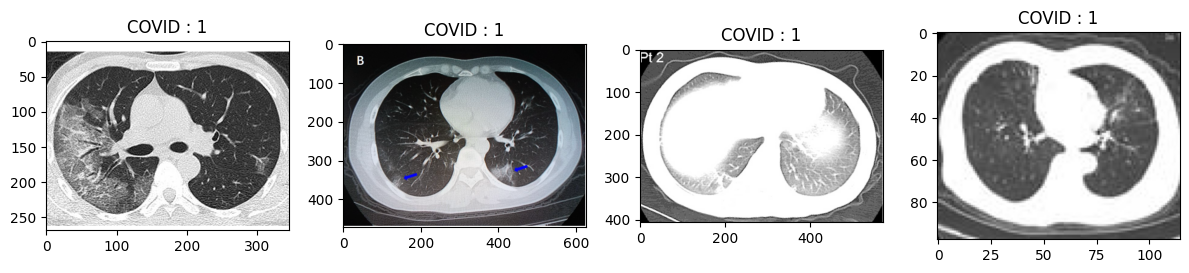

In [21]:
# Plot COVID IMAGE
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(DATASET_DIR+'/CT_COVID' + "/" + COVID_data[i])
    plt.imshow(img)
    plt.title('COVID : 1')
    plt.tight_layout()
plt.show()

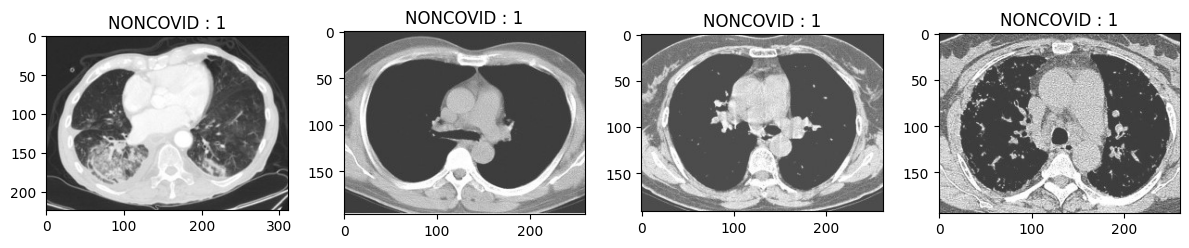

In [22]:
# Plot NONCOVID IMAGE
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(DATASET_DIR+'/CT_NonCOVID' + "/" + NONCOVID_data[i])
    plt.imshow(img)
    plt.title('NONCOVID : 1')
    plt.tight_layout()
plt.show()

# IMAGE HISTOGRAM

이미지 히스토그램은 디지털 이미지의 색조 분포를 그래픽으로 나타내는 히스토그램 각 색조 값의 픽셀 수를 표시한다.
특정 이미지에 대한 히스토그램을 보면 전체 색조 분포를 한 눈에 판단 할 수 있음

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_img_hist(item_dir, num_img=6):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 2, 1)
    img = cv2.imread(img_path, )
    plt.imshow(img)
    fig1.add_subplot(2, 2, 2)
    plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
  plt.tight_layout()

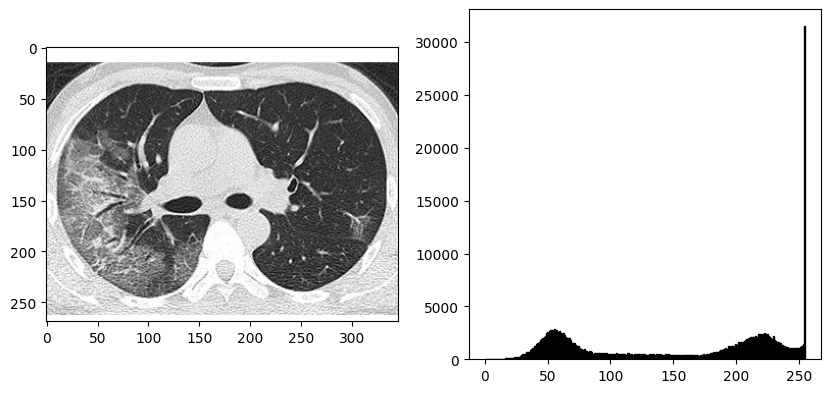

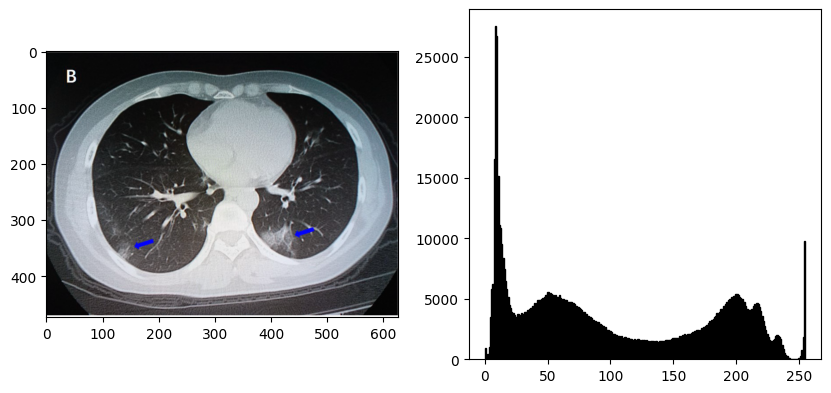

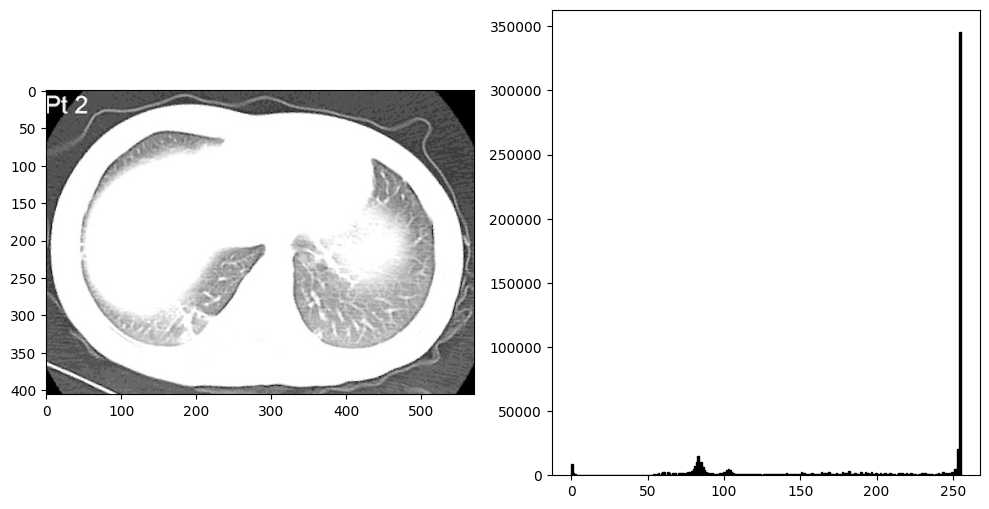

In [25]:
## COVID IMGE HISTOGRAM
C=os.path.join(DATASET_DIR+"/CT_COVID/")
plot_img_hist(C,3)

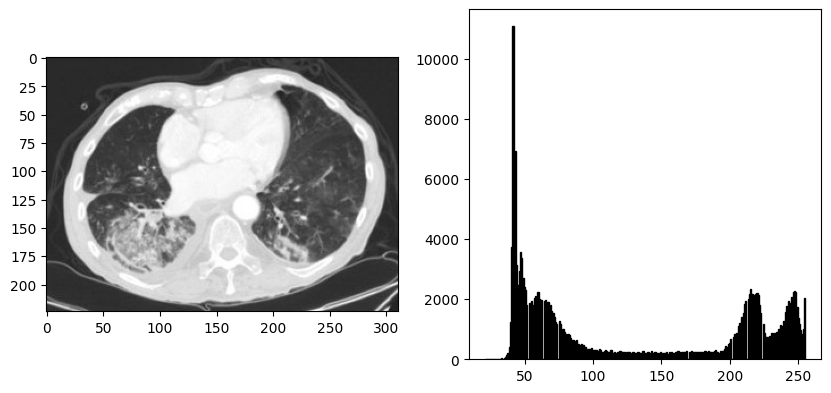

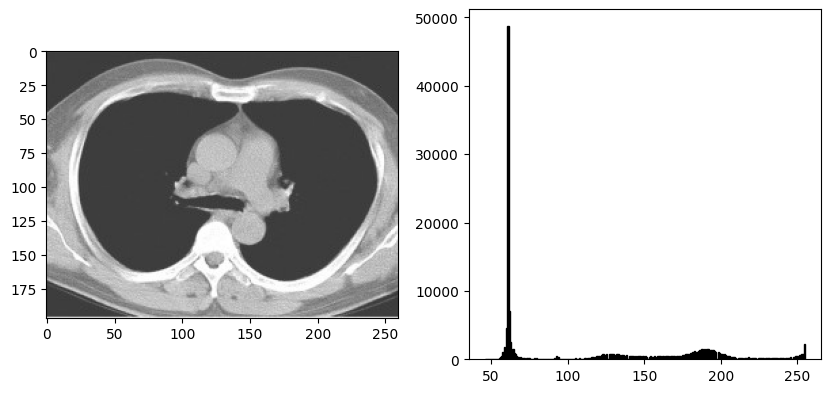

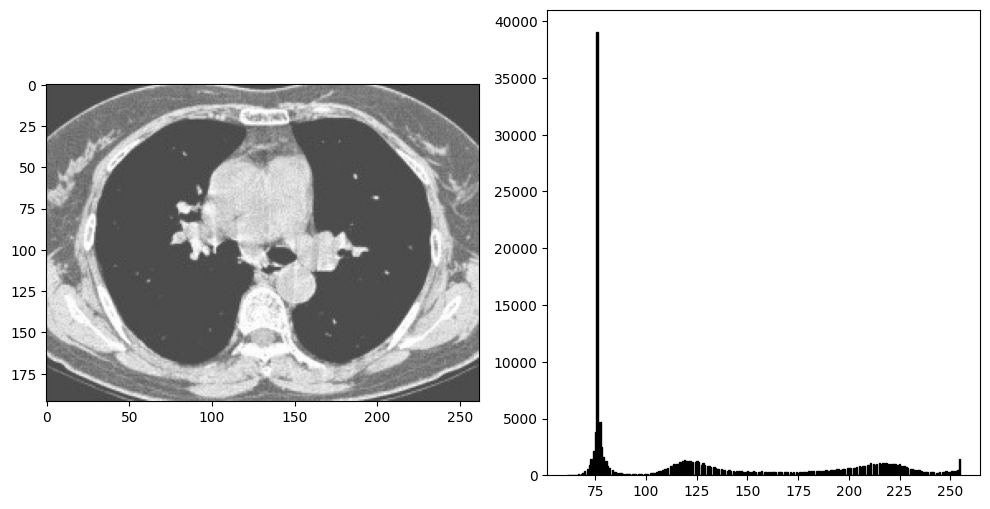

In [26]:
## NONCOVID IMGE HISTOGRAM
NC=os.path.join(DATASET_DIR+"/CT_NonCOVID/")
plot_img_hist(NC,3)

sample COVID image의 Histogram을 보면 대부분 Left-skewed histograms의 형태를 보여준다

sample NONCOVID image의 Histogram을 보면 대부분 Right-skewed histograms의 형태를 보여준다